In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## 1. Load, Visualization and Exploration of Data

#### Two main goals:
1. Establish the potential effect of each predictor variable on well performance.
2. Estimating the range of well performance for an area (given the certain geological properties)

### 1.1. Data Load

In [2]:
#Load data
train_feat = pd.read_excel("project_data.xlsx", sheet_name = "train_features_completion", index_col='Unnamed: 0')

train_target = pd.read_excel("project_data.xlsx", sheet_name = "train_target",index_col='Unnamed: 0')

new = pd.read_excel("project_data.xlsx", sheet_name = "new_unseen_data",index_col='Unnamed: 0') 

In [3]:
train_feat.head()

LL MULTI  SAND CONC MODEL  LATERAL SPACING (M)  AREA (AC)       TVD(M)  \
653      1.000                3                  400      349.7  2956.900756   
1591     0.889                2                  200      263.6  2956.900756   
1307     0.889                4                  200      199.4  2956.900756   
539      0.889                4                  200      155.5  2956.900756   
682      1.000                4                  300      263.3  2956.900756   

      LATERAL LENGTH (M)  STAGES  PERF CLUSTERS  SAND INTENSITY(KG.M3)  \
653                 3500      46             92                 2000.0   
1591                5300      78            156                 1132.1   
1307                4000     116            116                 4500.0   
539                 3100      34             68                 4516.1   
682                 3500      34             68                 3000.0   

      FLUID INTENSITY (M3/M)  INJ. RATE  PERM  PAY THICKNESS  \
653                     20.0         18   177             42   
1591                     9.5         18   177             42   
1307                    18.0         18   177             42   
539                     18.1         18   177             42   
682                     12.0         18   177             42   

      FRACTURE 1/2 LENGTH  FRACTURE CONDUCTIVITY  
653             154.97467              94.973062  
1591            116.54221             105.143550  
1307            169.71684             365.525890  
539             154.53355             317.082440  
682             140.73170             310.171940

In [4]:
train_target.head()

REC. EFFICIENCY (GAS)  REC. EFFICIENCY (OIL)   DRILLING COST  \
653                0.434648                      0     3396.489455   
1591               0.682453                      0     5152.752393   
1307               0.734736                      0     3884.340271   
539                0.709425                      0     3006.208802   
682                0.523262                      0     3396.489455   

      COMPLETION COST  EQUIPMENT COST  TOTAL WELL COST      IP90 GAS  \
653       4707.802059             300      8404.291514   7888.914474   
1591      4475.043418             300      9927.795810  10600.657895   
1307      7522.065922             300     11706.406193   9868.421053   
539       5276.606255             300      8582.815057   5897.587719   
682       4233.663765             300      7930.153221   5629.418860   

      IP90 OIL    IP90 COND  GAS (EUR)  ...  EFFECTIVE IRR       PV(10)  \
653          0   980.072400   5.661301  ...       0.853884  6930.382442   
1591         0  1322.339656   6.712743  ...       1.087076  9552.278968   
1307         0  1225.836002   5.392724  ...       0.728381  7666.190920   
539          0   733.098023   4.067688  ...       0.409468  4064.735533   
682          0   705.628719   5.131829  ...       0.468071  5073.862174   

           PV(15)   Royalty    PAYOUT       LIFE    NETBACK       F&D  \
653   5358.070652  0.082517  1.333333  40.000000  14.327106  5.133588   
1591  7588.689882  0.090752  1.166667  40.000000  14.497720  5.089388   
1307  6020.435025  0.050019  1.416667  34.166667  15.766205  7.385450   
539   2771.923567  0.048097  2.083333  36.583333  14.814777  7.277691   
682   3468.582212  0.065236  2.000000  40.000000  14.407753  5.391182   

      RECYCLE RATIO   PV15 PI  
653        2.790856  1.664542  
1591       2.848618  1.796763  
1307       2.134766  1.536067  
539        2.035642  1.336641  
682        2.672466  1.455917  

[5 rows x 22 columns]

In [5]:
train_feat.isna().any() #check if NaN are present

LL MULTI                  False
SAND CONC MODEL           False
LATERAL SPACING (M)       False
AREA (AC)                 False
TVD(M)                    False
LATERAL LENGTH (M)        False
STAGES                    False
PERF CLUSTERS             False
SAND INTENSITY(KG.M3)     False
FLUID INTENSITY (M3/M)    False
INJ. RATE                 False
PERM                      False
PAY THICKNESS             False
FRACTURE 1/2 LENGTH       False
FRACTURE CONDUCTIVITY     False
dtype: bool

In [6]:
#Using inplace to save the replacement of various missing values.
train_feat.replace([np.inf, -np.inf, np.inf, -999, 999, '', " ", 'inf', 'NaN'], np.nan, inplace=True)

In [7]:
train_feat.isna().any() #check if NaN are present

LL MULTI                  False
SAND CONC MODEL           False
LATERAL SPACING (M)       False
AREA (AC)                 False
TVD(M)                    False
LATERAL LENGTH (M)        False
STAGES                    False
PERF CLUSTERS             False
SAND INTENSITY(KG.M3)     False
FLUID INTENSITY (M3/M)    False
INJ. RATE                 False
PERM                      False
PAY THICKNESS             False
FRACTURE 1/2 LENGTH       False
FRACTURE CONDUCTIVITY     False
dtype: bool

- No missing data

In [8]:
(train_feat== 0).sum()

LL MULTI                  0
SAND CONC MODEL           2
LATERAL SPACING (M)       0
AREA (AC)                 0
TVD(M)                    0
LATERAL LENGTH (M)        0
STAGES                    0
PERF CLUSTERS             0
SAND INTENSITY(KG.M3)     0
FLUID INTENSITY (M3/M)    0
INJ. RATE                 0
PERM                      0
PAY THICKNESS             0
FRACTURE 1/2 LENGTH       0
FRACTURE CONDUCTIVITY     0
dtype: int64

#### Features

In [9]:
#Features
train_feat.columns

Index(['LL MULTI', 'SAND CONC MODEL', 'LATERAL SPACING (M)', 'AREA (AC)',
       'TVD(M)', 'LATERAL LENGTH (M)', 'STAGES', 'PERF CLUSTERS',
       'SAND INTENSITY(KG.M3)', 'FLUID INTENSITY (M3/M)', 'INJ. RATE', 'PERM',
       'PAY THICKNESS', 'FRACTURE 1/2 LENGTH', 'FRACTURE CONDUCTIVITY'],
      dtype='object')

In [10]:
train_feat.describe()

LL MULTI  SAND CONC MODEL  LATERAL SPACING (M)    AREA (AC)  \
count  1285.000000      1285.000000          1285.000000  1285.000000   
mean      0.944802         3.004669           356.933852   347.370272   
std       0.055521         0.819340           123.615319   158.168099   
min       0.889000         0.000000           200.000000   110.400000   
25%       0.889000         2.000000           200.000000   224.300000   
50%       1.000000         3.000000           300.000000   309.800000   
75%       1.000000         4.000000           400.000000   448.600000   
max       1.000000         4.000000           536.000000   801.600000   

             TVD(M)  LATERAL LENGTH (M)       STAGES  PERF CLUSTERS  \
count  1.285000e+03         1285.000000  1285.000000    1285.000000   
mean   2.956901e+03         3895.501946    70.221012      94.133074   
std    7.096821e-11         1105.093419    32.987622      29.907180   
min    2.956901e+03         2200.000000    25.000000      49.000000   
25%    2.956901e+03         3100.000000    46.000000      68.000000   
50%    2.956901e+03         4000.000000    65.000000      91.000000   
75%    2.956901e+03         4500.000000    91.000000     116.000000   
max    2.956901e+03         6000.000000   155.000000     156.000000   

       SAND INTENSITY(KG.M3)  FLUID INTENSITY (M3/M)  INJ. RATE    PERM  \
count            1285.000000             1285.000000     1285.0  1285.0   
mean             2721.288839               18.394599       18.0   177.0   
std              1196.769557               10.525048        0.0     0.0   
min              1000.000000                4.000000       18.0   177.0   
25%              2000.000000               10.600000       18.0   177.0   
50%              3000.000000               16.000000       18.0   177.0   
75%              4000.000000               22.700000       18.0   177.0   
max              4545.500000               45.500000       18.0   177.0   

       PAY THICKNESS  FRACTURE 1/2 LENGTH  FRACTURE CONDUCTIVITY  
count    1285.000000          1285.000000            1285.000000  
mean       41.962646           163.006643             201.204228  
std         0.668731            36.425999              97.729975  
min        30.000000            87.609094              88.630919  
25%        42.000000           136.211660             108.886080  
50%        42.000000           160.519880             176.328790  
75%        42.000000           187.541580             301.886290  
max        42.000000           254.072020             375.121530

In [11]:
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 653 to 257
Data columns (total 15 columns):
LL MULTI                  1285 non-null float64
SAND CONC MODEL           1285 non-null int64
LATERAL SPACING (M)       1285 non-null int64
AREA (AC)                 1285 non-null float64
TVD(M)                    1285 non-null float64
LATERAL LENGTH (M)        1285 non-null int64
STAGES                    1285 non-null int64
PERF CLUSTERS             1285 non-null int64
SAND INTENSITY(KG.M3)     1285 non-null float64
FLUID INTENSITY (M3/M)    1285 non-null float64
INJ. RATE                 1285 non-null int64
PERM                      1285 non-null int64
PAY THICKNESS             1285 non-null int64
FRACTURE 1/2 LENGTH       1285 non-null float64
FRACTURE CONDUCTIVITY     1285 non-null float64
dtypes: float64(7), int64(8)
memory usage: 160.6 KB


In [12]:
train_feat.groupby('LL MULTI').count()

SAND CONC MODEL  LATERAL SPACING (M)  AREA (AC)  TVD(M)  \
LL MULTI                                                            
0.889                 639                  639        639     639   
1.000                 646                  646        646     646   

          LATERAL LENGTH (M)  STAGES  PERF CLUSTERS  SAND INTENSITY(KG.M3)  \
LL MULTI                                                                     
0.889                    639     639            639                    639   
1.000                    646     646            646                    646   

          FLUID INTENSITY (M3/M)  INJ. RATE  PERM  PAY THICKNESS  \
LL MULTI                                                           
0.889                        639        639   639            639   
1.000                        646        646   646            646   

          FRACTURE 1/2 LENGTH  FRACTURE CONDUCTIVITY  
LL MULTI                                              
0.889                     639                    639  
1.000                     646                    646

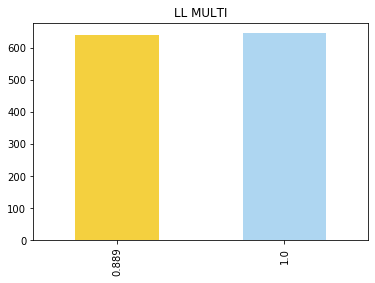

In [13]:
#Bar chart: SAND CONC MODEL
sand_mod = train_feat['LL MULTI'].value_counts().sort_index()
sand_mod.plot(kind='bar', title='LL MULTI', color=('#F4D03F', '#AED6F1'))
plt.show()

In [14]:
train_feat.groupby('SAND CONC MODEL').count()

LL MULTI  LATERAL SPACING (M)  AREA (AC)  TVD(M)  \
SAND CONC MODEL                                                     
0                       2                    2          2       2   
1                       2                    2          2       2   
2                     410                  410        410     410   
3                     445                  445        445     445   
4                     426                  426        426     426   

                 LATERAL LENGTH (M)  STAGES  PERF CLUSTERS  \
SAND CONC MODEL                                              
0                                 2       2              2   
1                                 2       2              2   
2                               410     410            410   
3                               445     445            445   
4                               426     426            426   

                 SAND INTENSITY(KG.M3)  FLUID INTENSITY (M3/M)  INJ. RATE  \
SAND CONC MODEL                                                             
0                                    2                       2          2   
1                                    2                       2          2   
2                                  410                     410        410   
3                                  445                     445        445   
4                                  426                     426        426   

                 PERM  PAY THICKNESS  FRACTURE 1/2 LENGTH  \
SAND CONC MODEL                                             
0                   2              2                    2   
1                   2              2                    2   
2                 410            410                  410   
3                 445            445                  445   
4                 426            426                  426   

                 FRACTURE CONDUCTIVITY  
SAND CONC MODEL                         
0                                    2  
1                                    2  
2                                  410  
3                                  445  
4                                  426

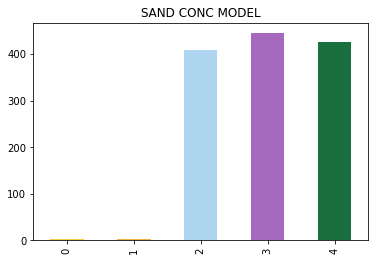

In [15]:
#Bar chart: SAND CONC MODEL
sand_mod = train_feat['SAND CONC MODEL'].value_counts().sort_index()
sand_mod.plot(kind='bar', title='SAND CONC MODEL', color=('#F4D03F', '#F5B041','#AED6F1', '#A569BD', '#196F3D'))
plt.show()

In [16]:
train_feat.groupby('PAY THICKNESS').count()

LL MULTI  SAND CONC MODEL  LATERAL SPACING (M)  AREA (AC)  \
PAY THICKNESS                                                              
30                    4                4                    4          4   
42                 1281             1281                 1281       1281   

               TVD(M)  LATERAL LENGTH (M)  STAGES  PERF CLUSTERS  \
PAY THICKNESS                                                      
30                  4                   4       4              4   
42               1281                1281    1281           1281   

               SAND INTENSITY(KG.M3)  FLUID INTENSITY (M3/M)  INJ. RATE  PERM  \
PAY THICKNESS                                                                   
30                                 4                       4          4     4   
42                              1281                    1281       1281  1281   

               FRACTURE 1/2 LENGTH  FRACTURE CONDUCTIVITY  
PAY THICKNESS                                              
30                               4                      4  
42                            1281                   1281

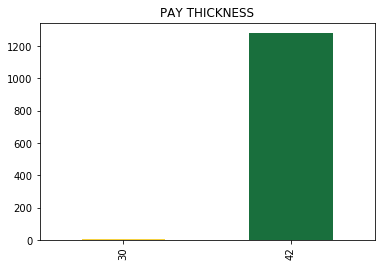

In [17]:
#Bar chart: PAY THICKNESS
sand_mod = train_feat['PAY THICKNESS'].value_counts().sort_index()
sand_mod.plot(kind='bar', title='PAY THICKNESS', color=('#F4D03F', '#196F3D'))
plt.show()

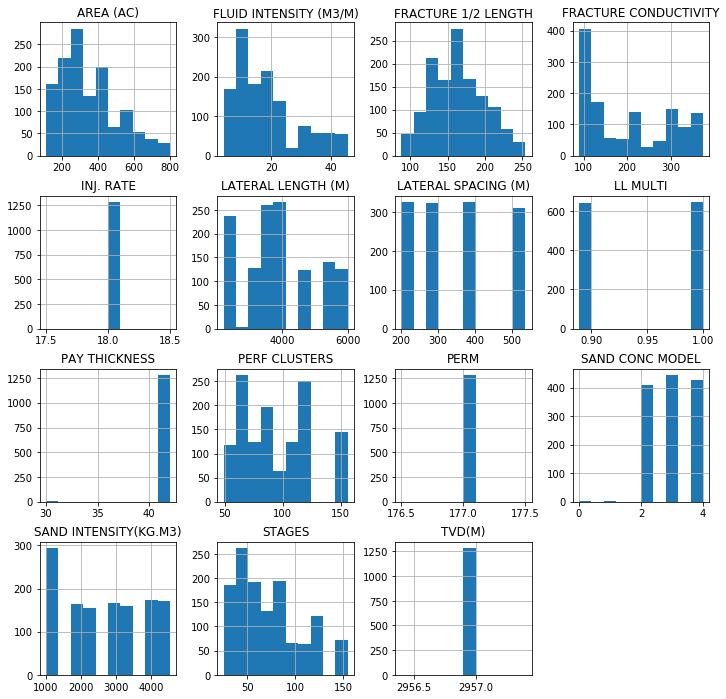

In [18]:
#Histogram
train_feat.hist(figsize=(12,12))
plt.show()

#### Targets

In [19]:
train_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 653 to 257
Data columns (total 22 columns):
REC. EFFICIENCY (GAS)    1285 non-null float64
REC. EFFICIENCY (OIL)    1285 non-null int64
 DRILLING COST           1285 non-null float64
COMPLETION COST          1285 non-null float64
EQUIPMENT COST           1285 non-null int64
TOTAL WELL COST          1285 non-null float64
IP90 GAS                 1285 non-null float64
IP90 OIL                 1285 non-null int64
IP90 COND                1285 non-null float64
GAS (EUR)                1285 non-null float64
OIL (EUR)                1285 non-null int64
COND (EUR)               1285 non-null float64
EFFECTIVE IRR            1285 non-null float64
PV(10)                   1285 non-null float64
PV(15)                   1285 non-null float64
Royalty                  1285 non-null float64
PAYOUT                   1285 non-null float64
LIFE                     1285 non-null float64
NETBACK                  1285 non-null float64
F&D    

#### Variance inflation factor (VIF)

In [20]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
calc_vif(train_feat)

C:\Users\Keyla Gonzalez Abad\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


variables        VIF
0                 LL MULTI   1.233287
1          SAND CONC MODEL   2.955775
2      LATERAL SPACING (M)  13.696893
3                AREA (AC)  21.864909
4                   TVD(M)   0.002399
5       LATERAL LENGTH (M)  16.557891
6                   STAGES  10.357657
7            PERF CLUSTERS  21.341910
8    SAND INTENSITY(KG.M3)  15.440359
9   FLUID INTENSITY (M3/M)  16.778836
10               INJ. RATE   0.000000
11                    PERM   0.000000
12           PAY THICKNESS   1.204354
13     FRACTURE 1/2 LENGTH  21.323185
14   FRACTURE CONDUCTIVITY  15.026129

- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

### 1.2. Visualization

#### Features

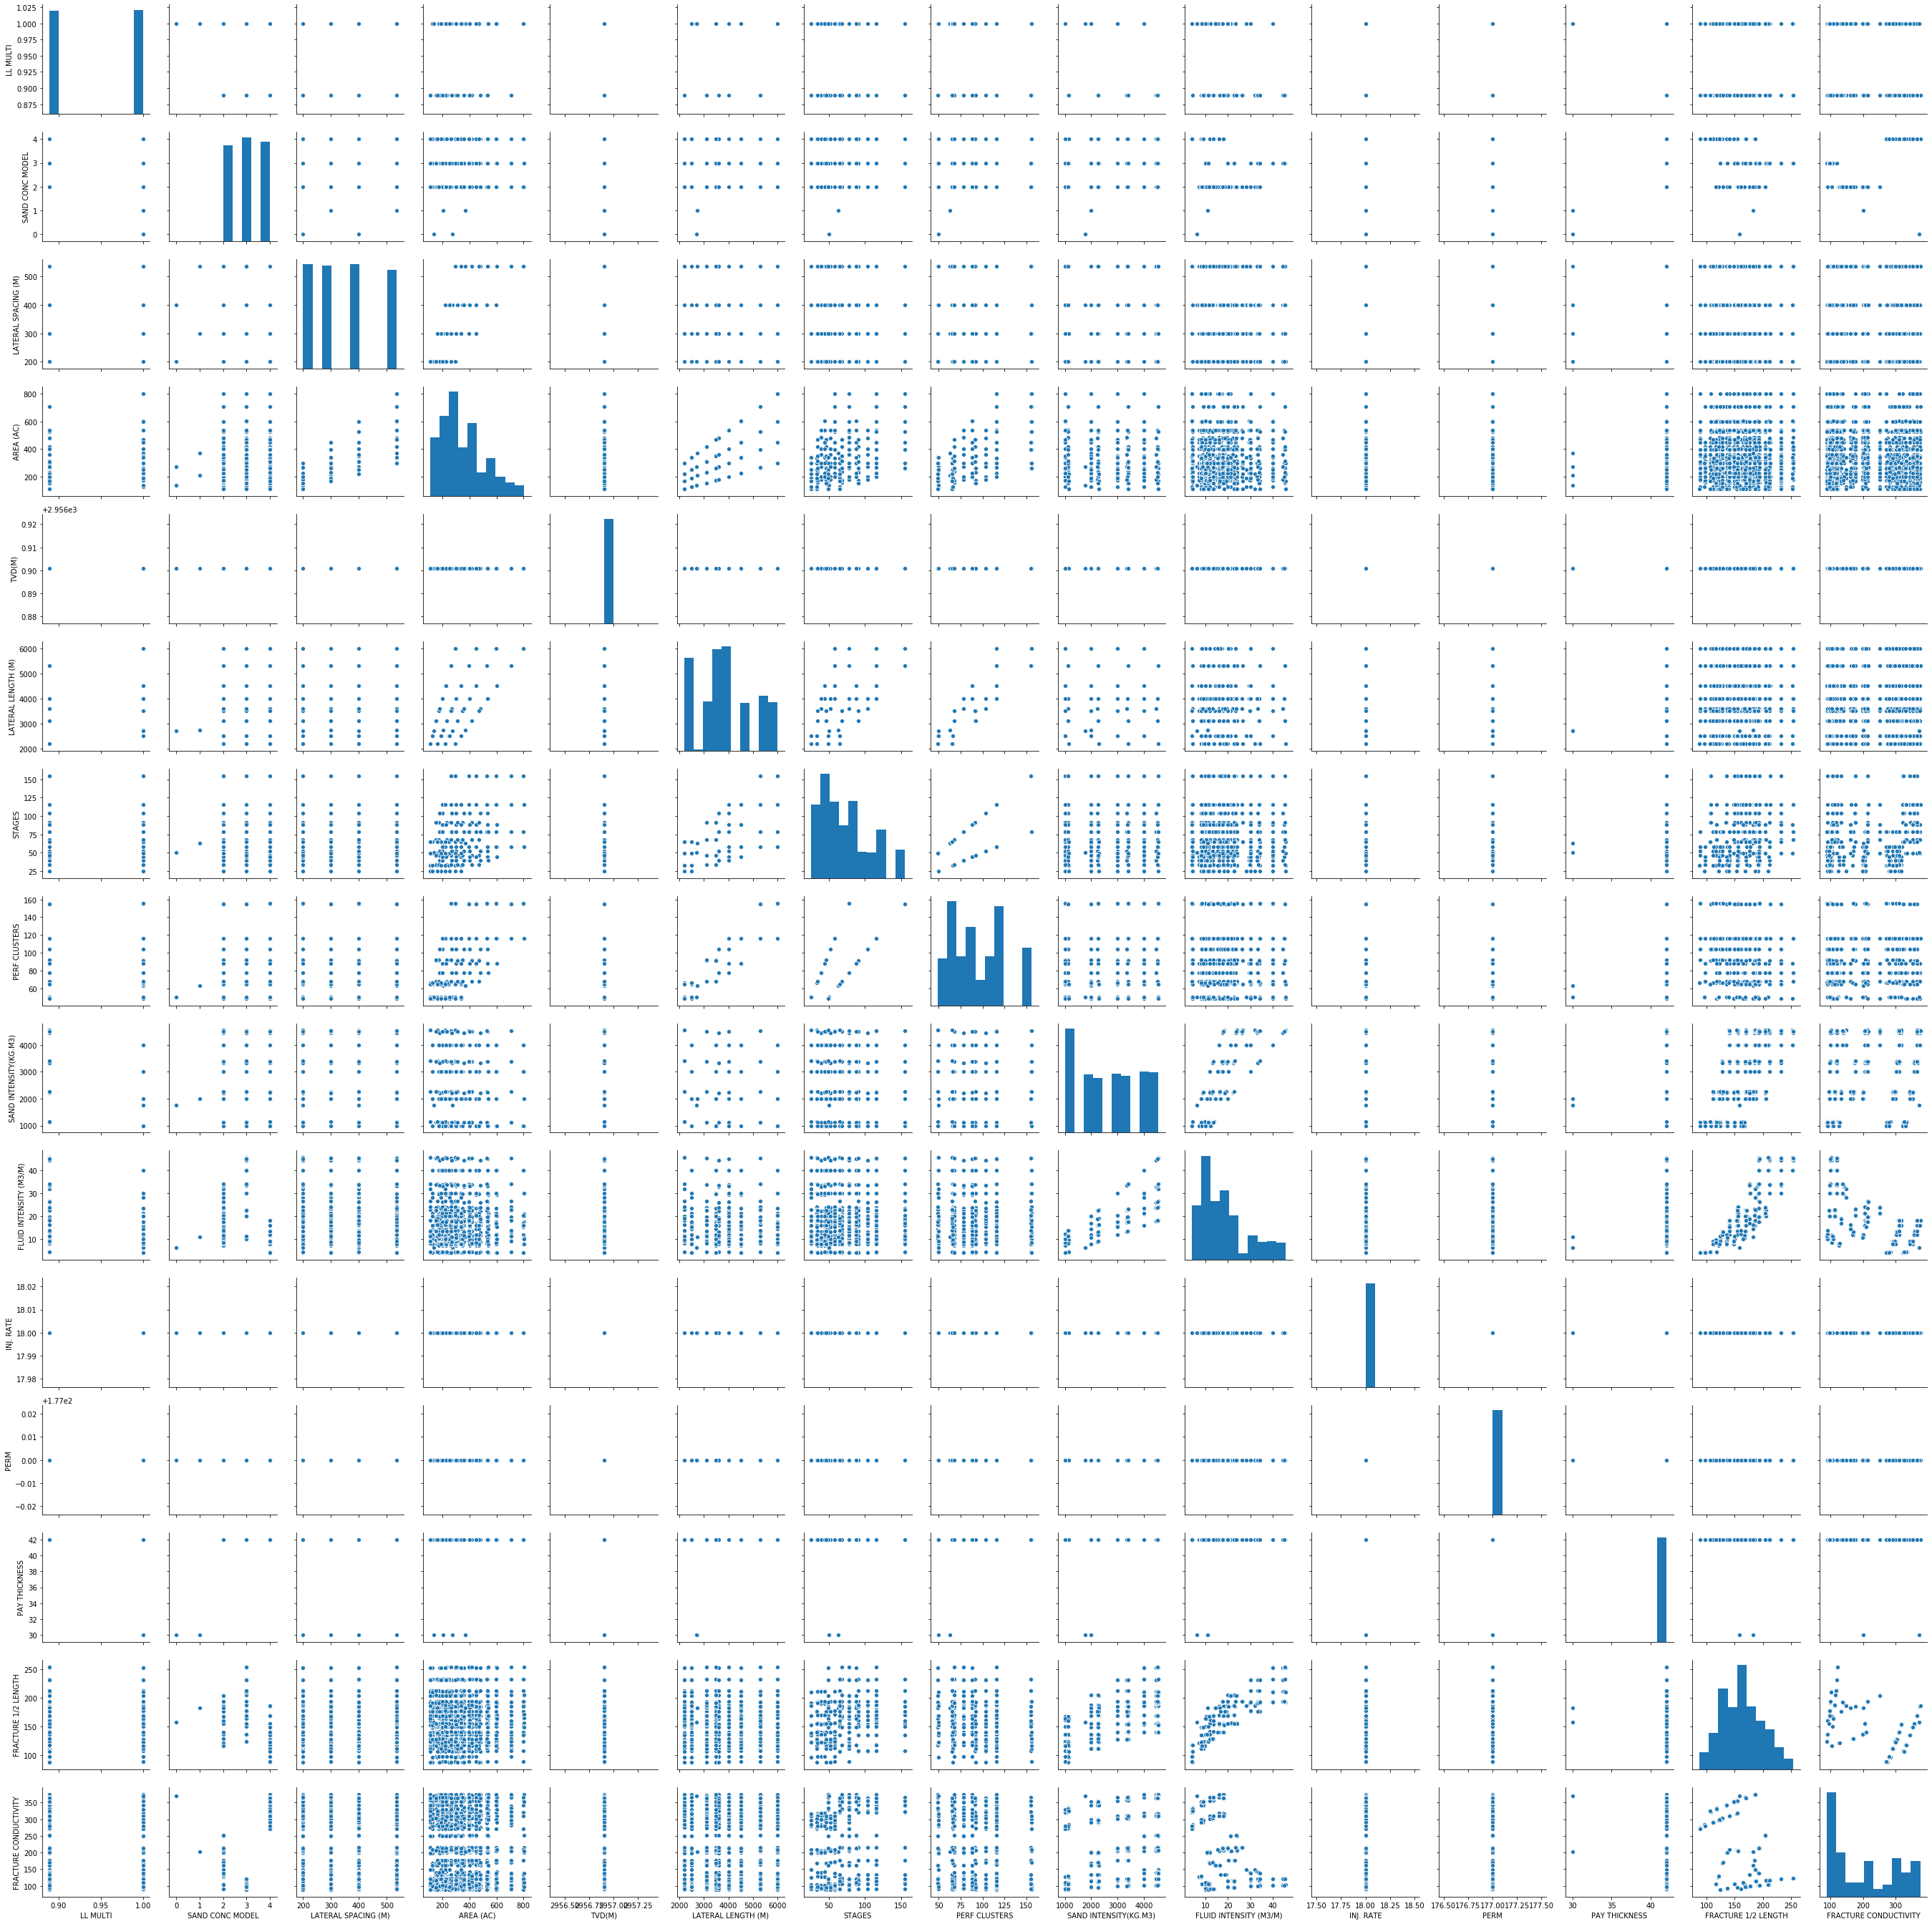

In [22]:
sns.pairplot(train_feat)
plt.show()

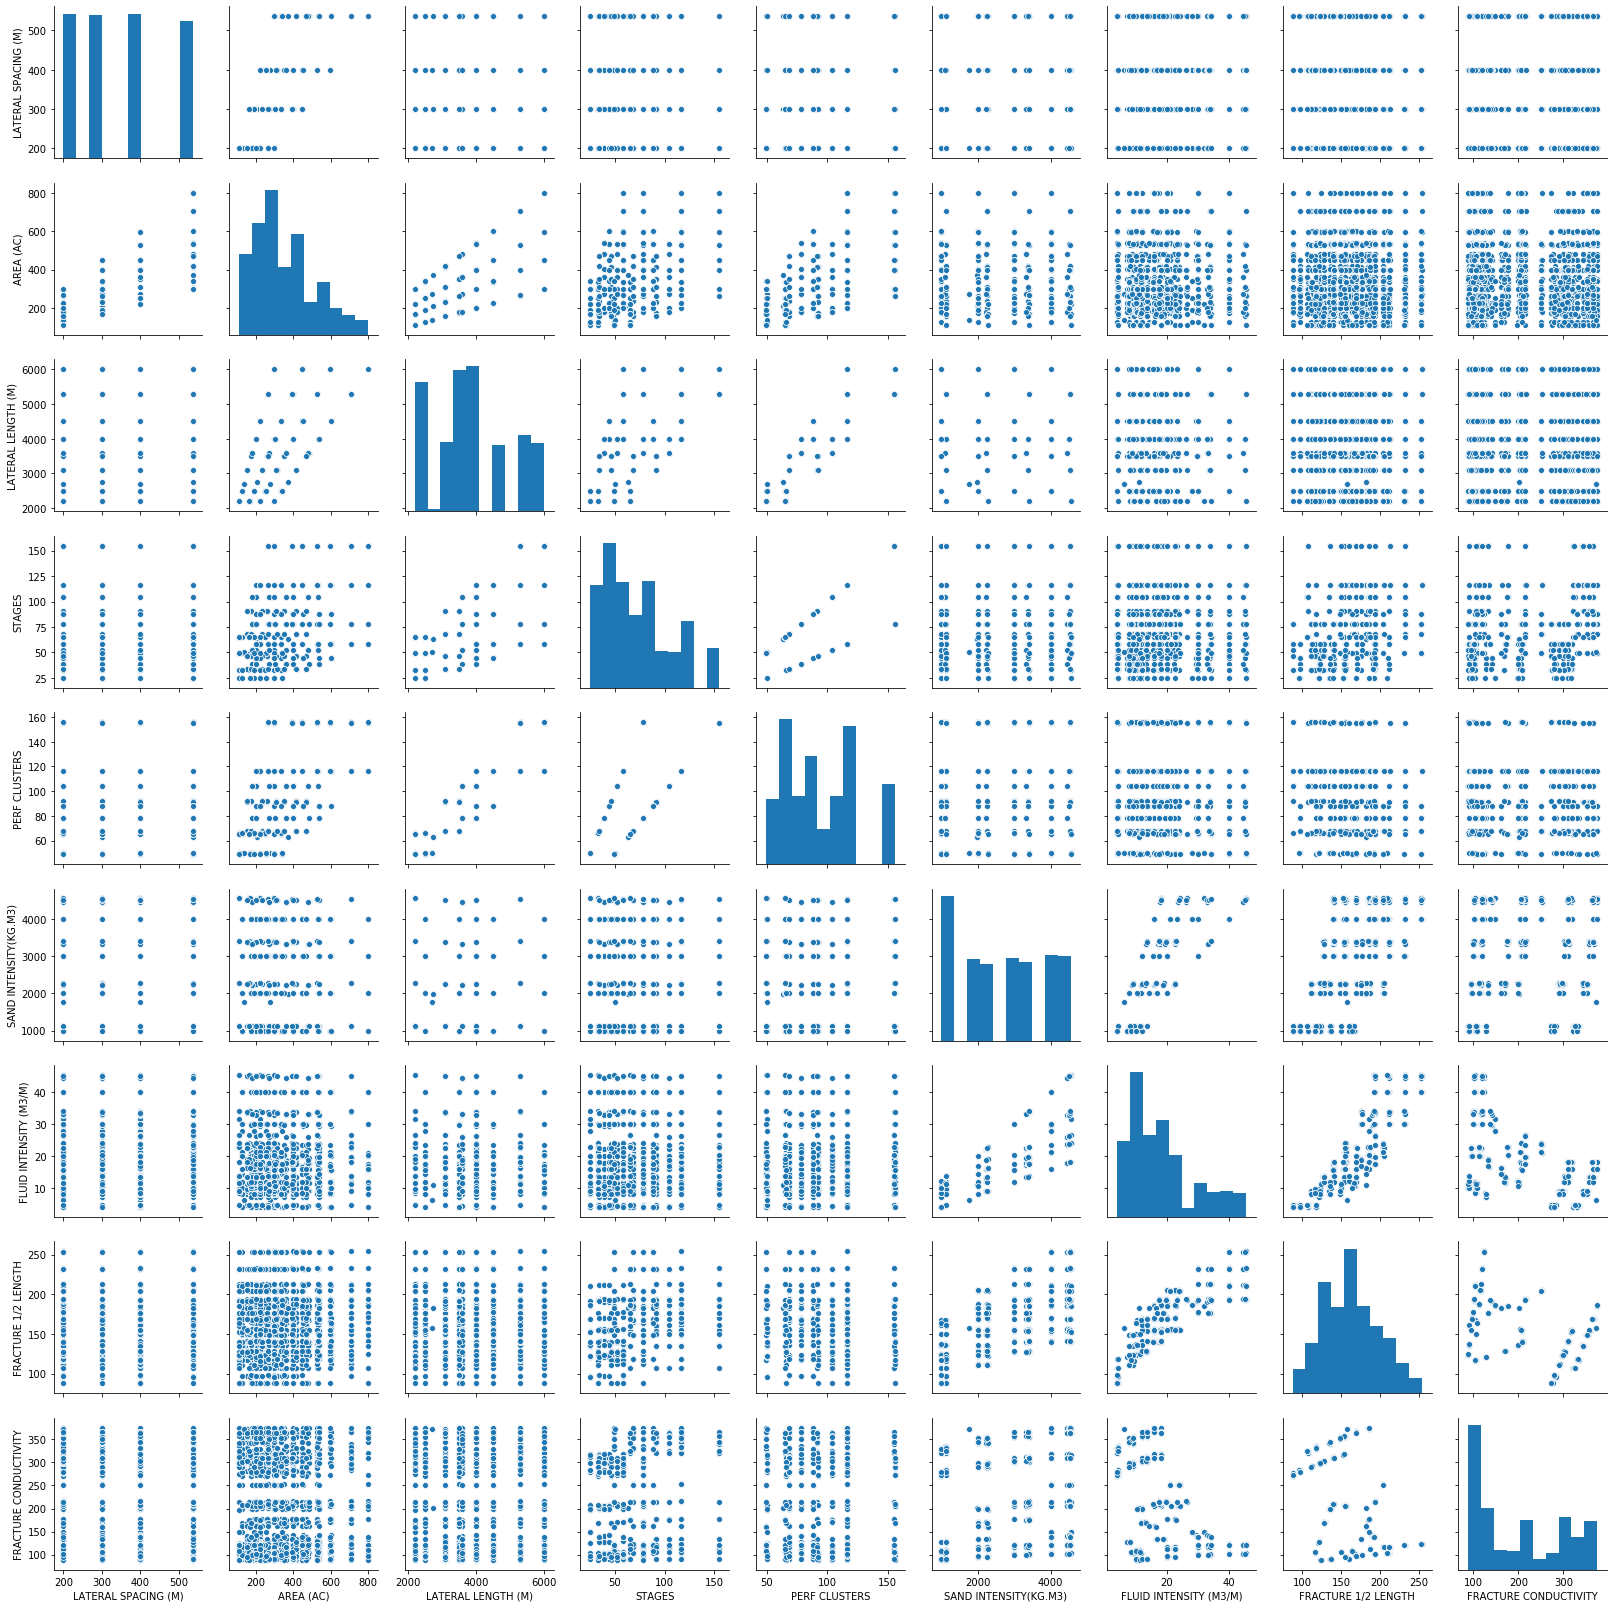

In [23]:
sns.pairplot(train_feat.drop(['LL MULTI','SAND CONC MODEL','TVD(M)','INJ. RATE', 'PERM','PAY THICKNESS'], axis = 1))
plt.show()

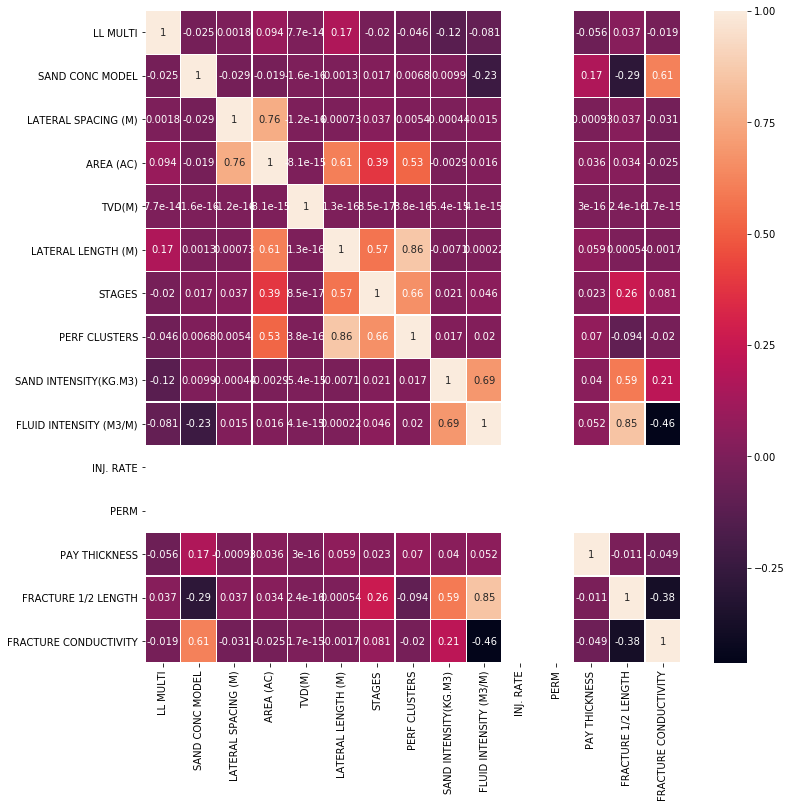

In [24]:
#Correlation matrix (Pearson)
fig, ax = plt.subplots(figsize=(12,12))
corrMatrix = train_feat.corr()
sns.heatmap(corrMatrix, annot=True,linewidths=.3, ax=ax)
plt.show()

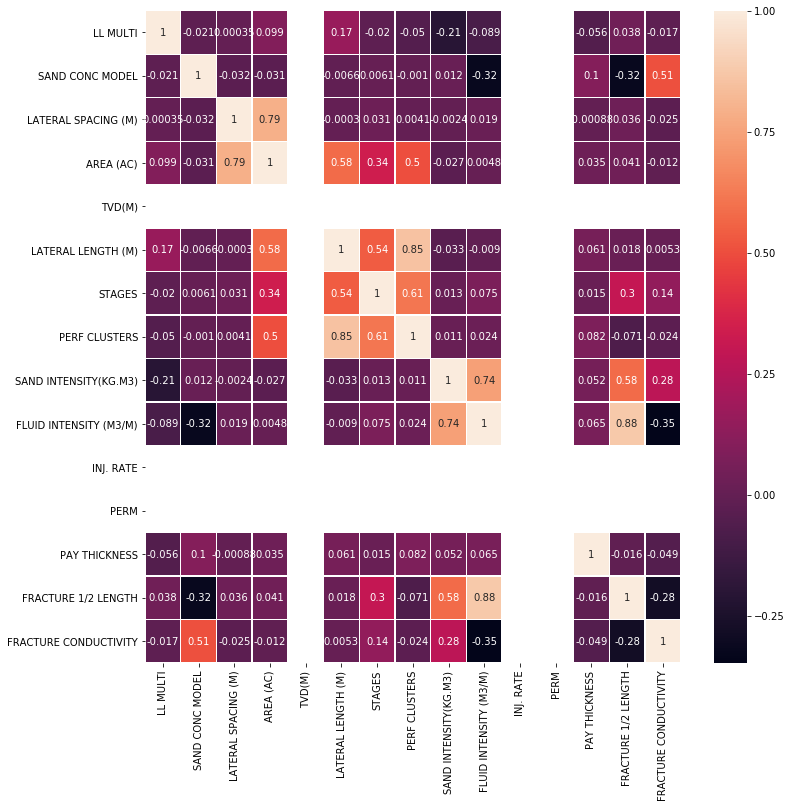

In [25]:
#Correlation matrix (Spearman)
fig, ax = plt.subplots(figsize=(12,12))
corrMatrix = train_feat.corr(method='spearman')
sns.heatmap(corrMatrix, annot=True,linewidths=.3, ax=ax)
plt.show()

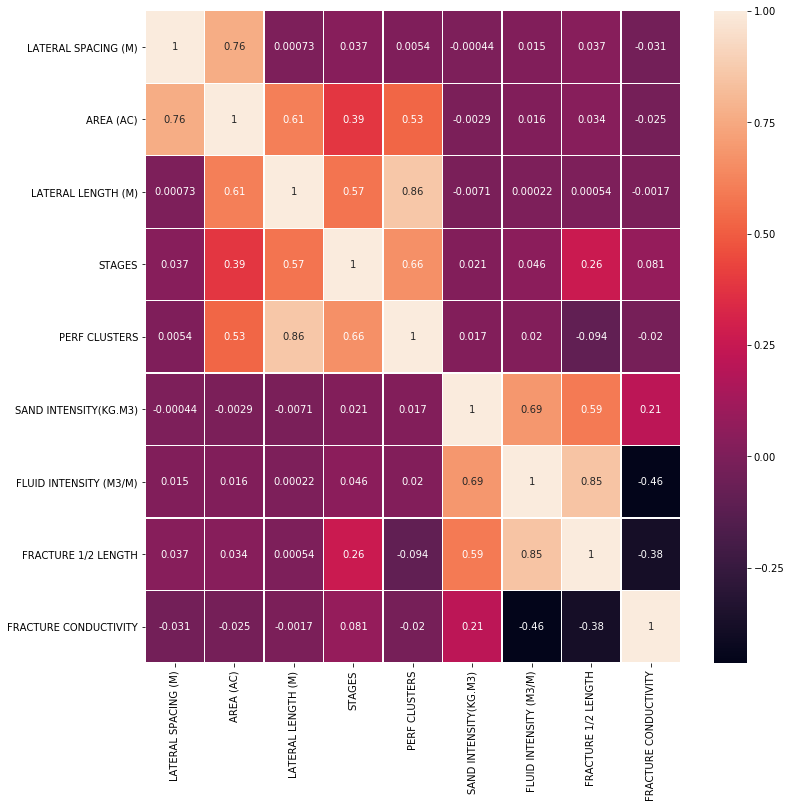

In [26]:
#Correlation matrix (Pearson)
fig, ax = plt.subplots(figsize=(12,12))
corrMatrix = train_feat.drop(['LL MULTI','SAND CONC MODEL','TVD(M)','INJ. RATE', 'PERM','PAY THICKNESS'], axis = 1).corr()
sns.heatmap(corrMatrix, annot=True,linewidths=.3, ax=ax)
plt.show()

In [27]:
#Unique items in a column that is categorical
train_feat['SAND CONC MODEL'] = train_feat['SAND CONC MODEL'].astype('category')
train_feat['LL MULTI'] = train_feat['LL MULTI'].astype('category')
train_feat.head()

LL MULTI SAND CONC MODEL  LATERAL SPACING (M)  AREA (AC)       TVD(M)  \
653     1.000               3                  400      349.7  2956.900756   
1591    0.889               2                  200      263.6  2956.900756   
1307    0.889               4                  200      199.4  2956.900756   
539     0.889               4                  200      155.5  2956.900756   
682     1.000               4                  300      263.3  2956.900756   

      LATERAL LENGTH (M)  STAGES  PERF CLUSTERS  SAND INTENSITY(KG.M3)  \
653                 3500      46             92                 2000.0   
1591                5300      78            156                 1132.1   
1307                4000     116            116                 4500.0   
539                 3100      34             68                 4516.1   
682                 3500      34             68                 3000.0   

      FLUID INTENSITY (M3/M)  INJ. RATE  PERM  PAY THICKNESS  \
653                     20.0         18   177             42   
1591                     9.5         18   177             42   
1307                    18.0         18   177             42   
539                     18.1         18   177             42   
682                     12.0         18   177             42   

      FRACTURE 1/2 LENGTH  FRACTURE CONDUCTIVITY  
653             154.97467              94.973062  
1591            116.54221             105.143550  
1307            169.71684             365.525890  
539             154.53355             317.082440  
682             140.73170             310.171940

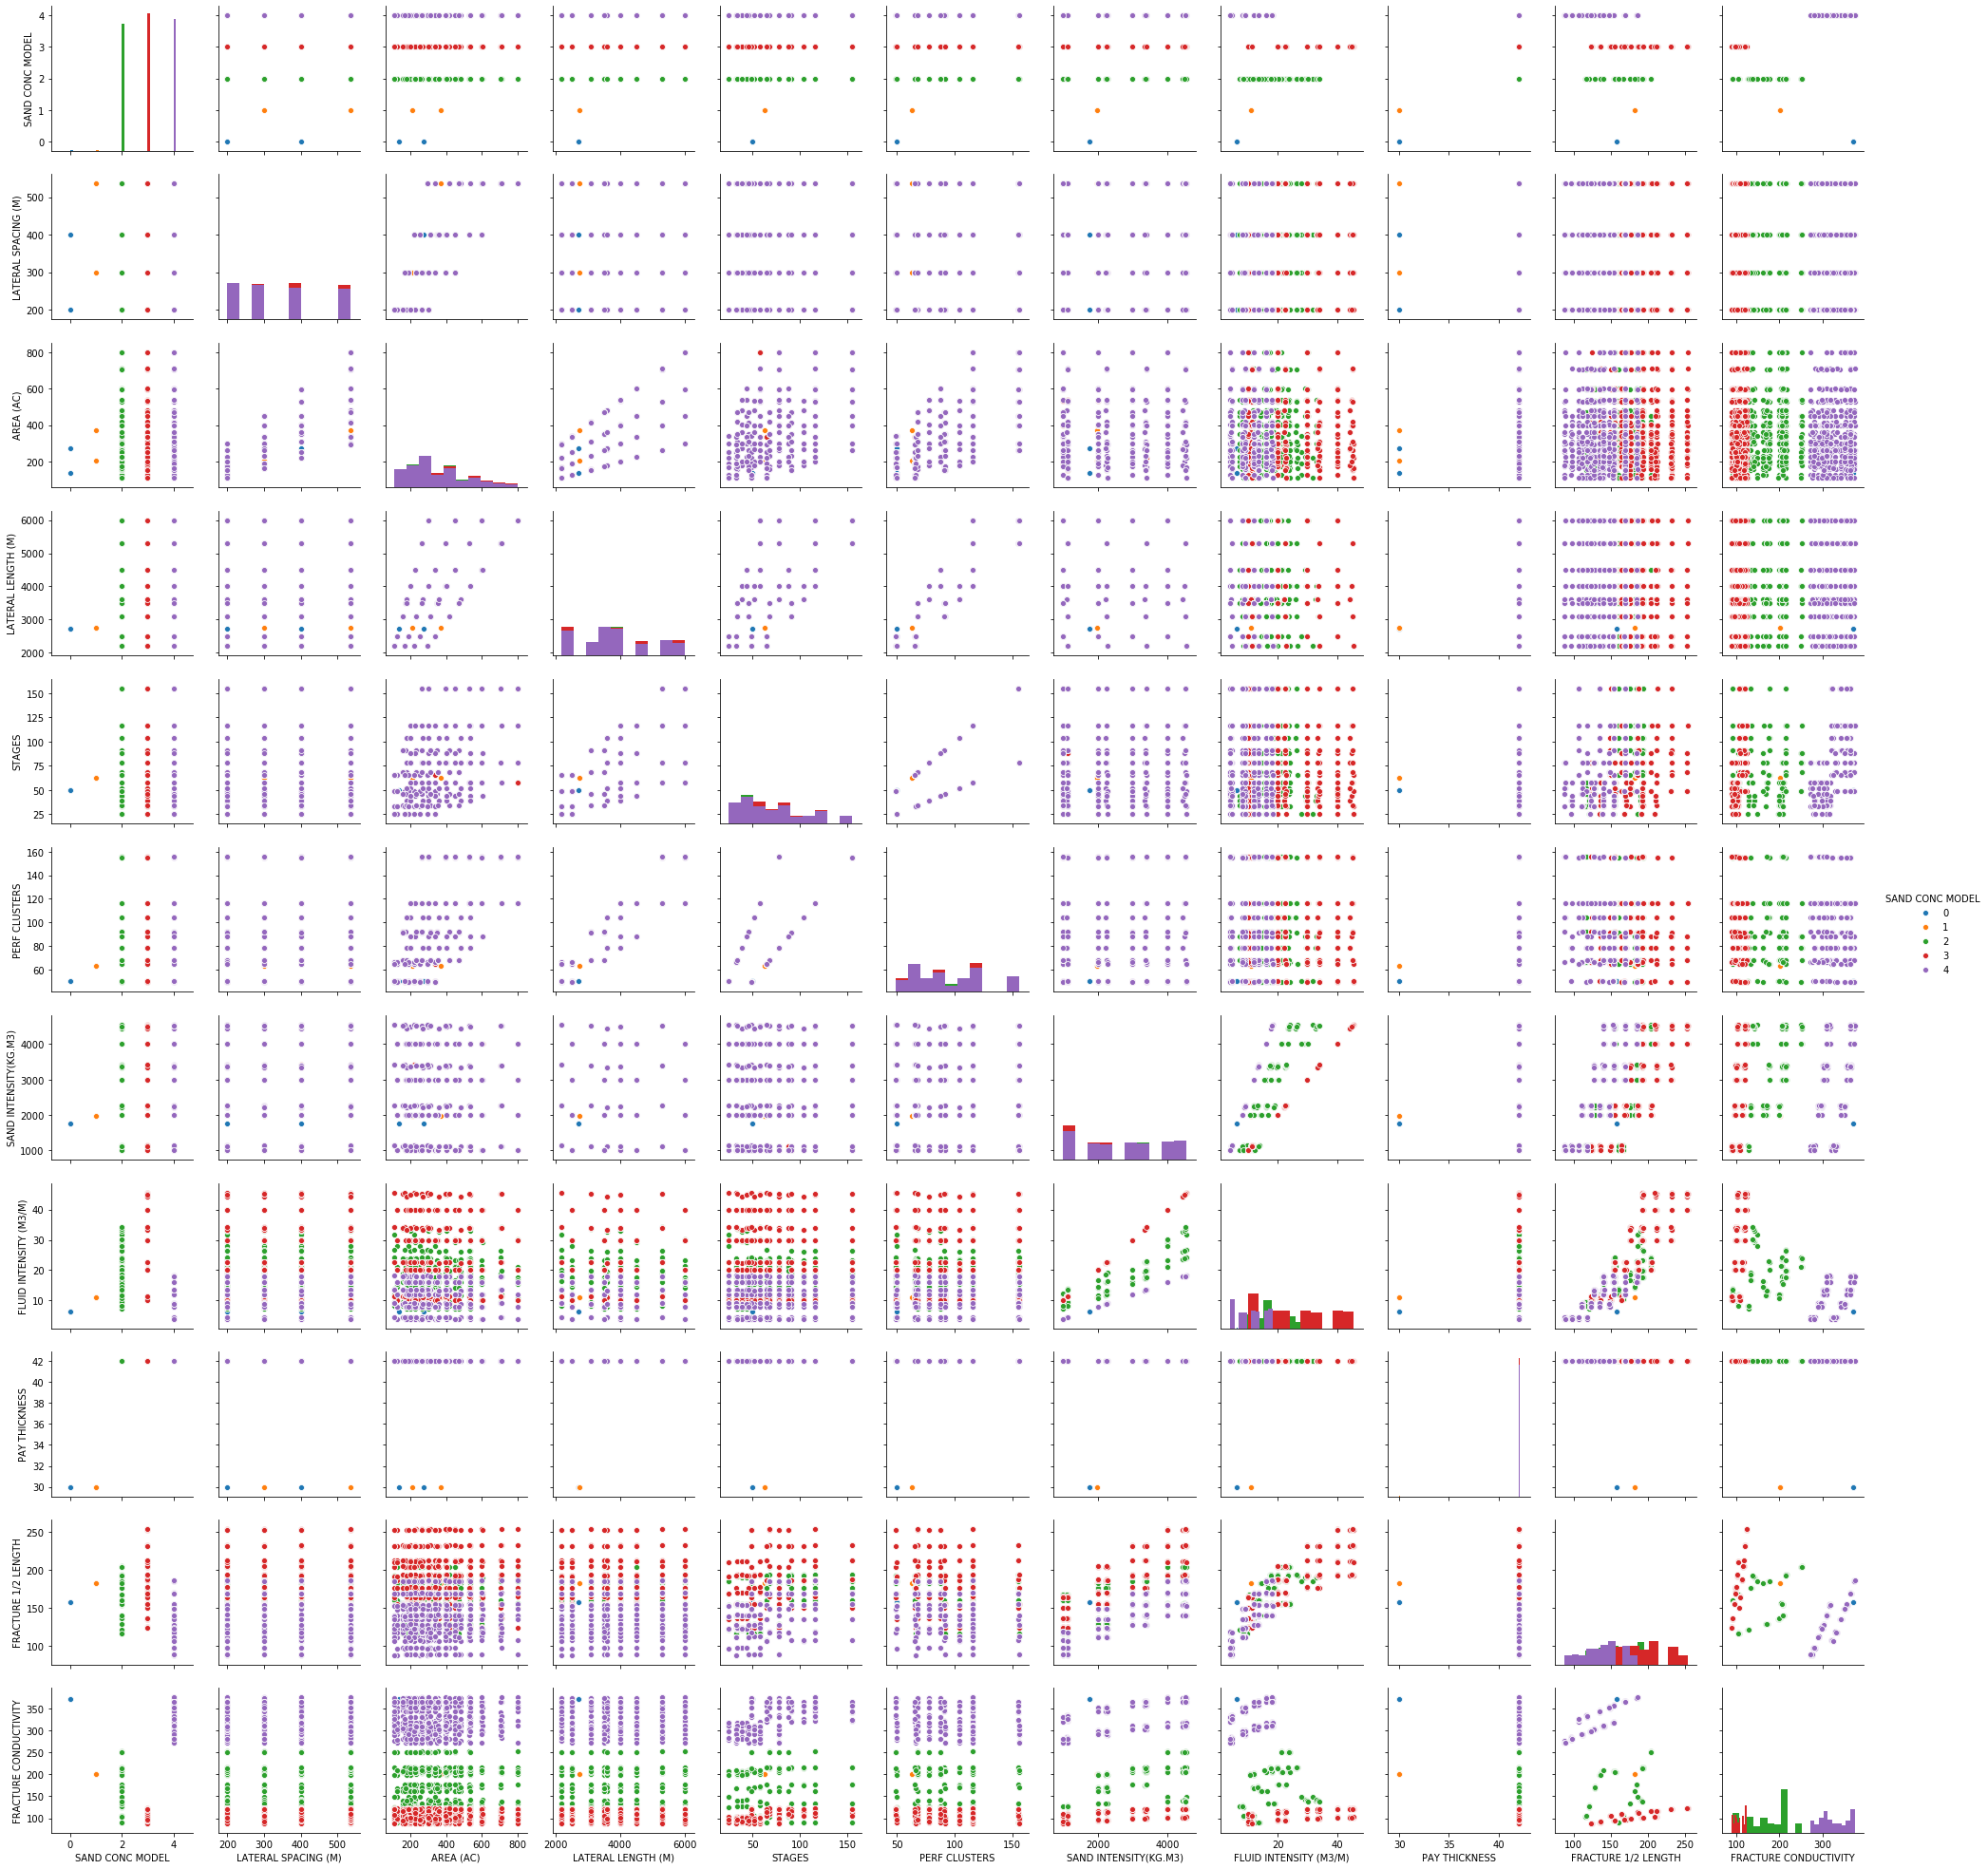

In [28]:
sns.pairplot(train_feat.drop(['LL MULTI','TVD(M)','INJ. RATE', 'PERM'], axis = 1),hue='SAND CONC MODEL',diag_kind='hist')
plt.show()

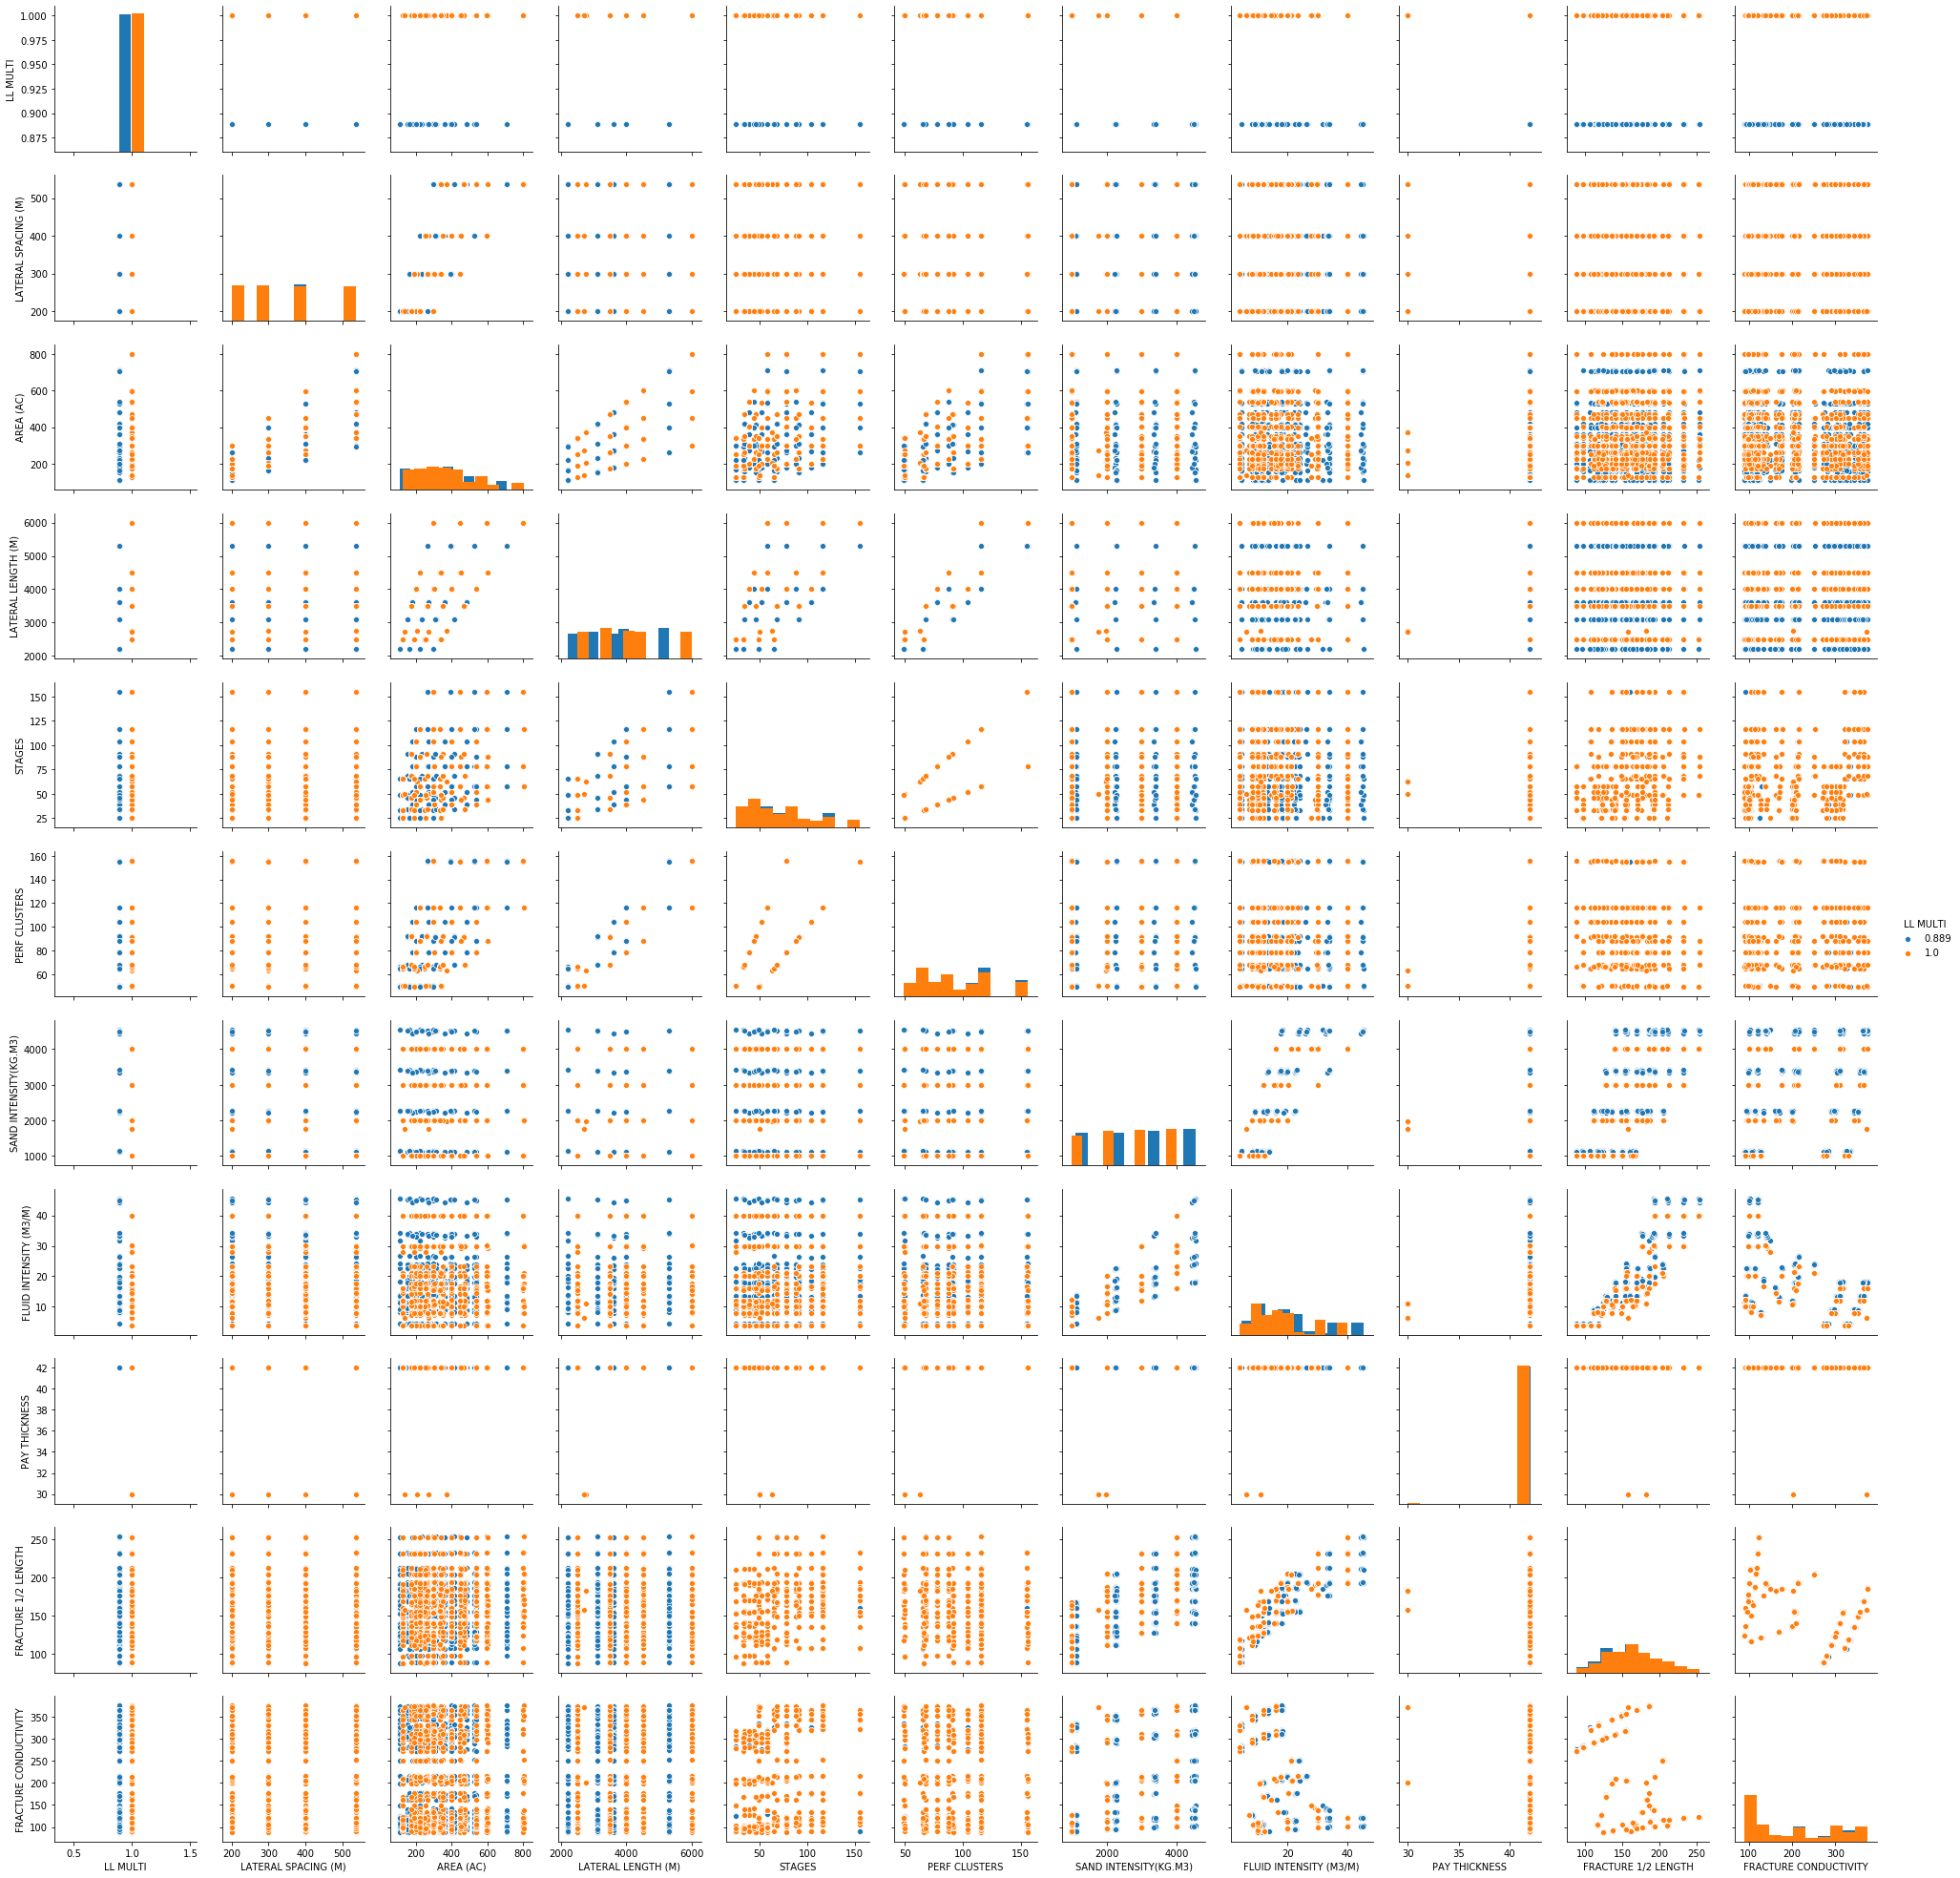

In [29]:
#Without ['SAND CONC MODEL','TVD(M)','INJ. RATE', 'PERM']
sns.pairplot(train_feat.drop(['SAND CONC MODEL','TVD(M)','INJ. RATE', 'PERM'], axis = 1),hue='LL MULTI',diag_kind='hist')
plt.show()

#### Features vs Each Target

In [30]:
feat_target=pd.concat([train_feat, train_target], axis=1)
feat_target.head()

LL MULTI SAND CONC MODEL  LATERAL SPACING (M)  AREA (AC)       TVD(M)  \
653     1.000               3                  400      349.7  2956.900756   
1591    0.889               2                  200      263.6  2956.900756   
1307    0.889               4                  200      199.4  2956.900756   
539     0.889               4                  200      155.5  2956.900756   
682     1.000               4                  300      263.3  2956.900756   

      LATERAL LENGTH (M)  STAGES  PERF CLUSTERS  SAND INTENSITY(KG.M3)  \
653                 3500      46             92                 2000.0   
1591                5300      78            156                 1132.1   
1307                4000     116            116                 4500.0   
539                 3100      34             68                 4516.1   
682                 3500      34             68                 3000.0   

      FLUID INTENSITY (M3/M)  ...  EFFECTIVE IRR       PV(10)       PV(15)  \
653                     20.0  ...       0.853884  6930.382442  5358.070652   
1591                     9.5  ...       1.087076  9552.278968  7588.689882   
1307                    18.0  ...       0.728381  7666.190920  6020.435025   
539                     18.1  ...       0.409468  4064.735533  2771.923567   
682                     12.0  ...       0.468071  5073.862174  3468.582212   

       Royalty    PAYOUT       LIFE    NETBACK       F&D  RECYCLE RATIO  \
653   0.082517  1.333333  40.000000  14.327106  5.133588       2.790856   
1591  0.090752  1.166667  40.000000  14.497720  5.089388       2.848618   
1307  0.050019  1.416667  34.166667  15.766205  7.385450       2.134766   
539   0.048097  2.083333  36.583333  14.814777  7.277691       2.035642   
682   0.065236  2.000000  40.000000  14.407753  5.391182       2.672466   

       PV15 PI  
653   1.664542  
1591  1.796763  
1307  1.536067  
539   1.336641  
682   1.455917  

[5 rows x 37 columns]

In [31]:
feat_target.columns

Index(['LL MULTI', 'SAND CONC MODEL', 'LATERAL SPACING (M)', 'AREA (AC)',
       'TVD(M)', 'LATERAL LENGTH (M)', 'STAGES', 'PERF CLUSTERS',
       'SAND INTENSITY(KG.M3)', 'FLUID INTENSITY (M3/M)', 'INJ. RATE', 'PERM',
       'PAY THICKNESS', 'FRACTURE 1/2 LENGTH', 'FRACTURE CONDUCTIVITY',
       'REC. EFFICIENCY (GAS)', 'REC. EFFICIENCY (OIL)', ' DRILLING COST',
       'COMPLETION COST', 'EQUIPMENT COST', 'TOTAL WELL COST', 'IP90 GAS',
       'IP90 OIL', 'IP90 COND', 'GAS (EUR)', 'OIL (EUR)', 'COND (EUR)',
       'EFFECTIVE IRR', 'PV(10)', 'PV(15)', 'Royalty', 'PAYOUT', 'LIFE',
       'NETBACK', 'F&D', 'RECYCLE RATIO', 'PV15 PI'],
      dtype='object')

In [32]:
feat_target.iloc[:,:15]

LL MULTI SAND CONC MODEL  LATERAL SPACING (M)  AREA (AC)       TVD(M)  \
653     1.000               3                  400      349.7  2956.900756   
1591    0.889               2                  200      263.6  2956.900756   
1307    0.889               4                  200      199.4  2956.900756   
539     0.889               4                  200      155.5  2956.900756   
682     1.000               4                  300      263.3  2956.900756   
...       ...             ...                  ...        ...          ...   
1321    0.889               2                  400      399.9  2956.900756   
38      0.889               4                  300      165.6  2956.900756   
1347    0.889               3                  200      199.4  2956.900756   
610     1.000               4                  300      263.3  2956.900756   
257     1.000               3                  400      252.1  2956.900756   

      LATERAL LENGTH (M)  STAGES  PERF CLUSTERS  SAND INTENSITY(KG.M3)  \
653                 3500      46             92                 2000.0   
1591                5300      78            156                 1132.1   
1307                4000     116            116                 4500.0   
539                 3100      34             68                 4516.1   
682                 3500      34             68                 3000.0   
...                  ...     ...            ...                    ...   
1321                4000      88             88                 4500.0   
38                  2200      65             65                 1136.4   
1347                4000      58            116                 4500.0   
610                 3500      34             68                 1000.0   
257                 2500      25             50                 2000.0   

      FLUID INTENSITY (M3/M)  INJ. RATE  PERM  PAY THICKNESS  \
653                     20.0         18   177             42   
1591                     9.5         18   177             42   
1307                    18.0         18   177             42   
539                     18.1         18   177             42   
682                     12.0         18   177             42   
...                      ...        ...   ...            ...   
1321                    23.8         18   177             42   
38                       4.5         18   177             42   
1347                    45.0         18   177             42   
610                      4.0         18   177             42   
257                     20.0         18   177             42   

      FRACTURE 1/2 LENGTH  FRACTURE CONDUCTIVITY  
653            154.974670              94.973062  
1591           116.542210             105.143550  
1307           169.716840             365.525890  
539            154.533550             317.082440  
682            140.731700             310.171940  
...                   ...                    ...  
1321           204.165520             251.287760  
38             106.670820             325.450980  
1347           193.969120             101.182460  
610             97.670423             279.915610  
257            169.036360              97.356243  

[1285 rows x 15 columns]

In [33]:
feat_target.iloc[:,16:]

REC. EFFICIENCY (OIL)   DRILLING COST  COMPLETION COST  EQUIPMENT COST  \
653                       0     3396.489455      4707.802059             300   
1591                      0     5152.752393      4475.043418             300   
1307                      0     3884.340271      7522.065922             300   
539                       0     3006.208802      5276.606255             300   
682                       0     3396.489455      4233.663765             300   
...                     ...             ...              ...             ...   
1321                      0     3884.340271      7838.681623             300   
38                        0     2128.080000      2178.140000             300   
1347                      0     3884.340271     10122.324974             300   
610                       0     3396.489455      2161.347795             300   
257                       0     2420.790000      3380.260000             300   

      TOTAL WELL COST      IP90 GAS  IP90 OIL    IP90 COND  GAS (EUR)  \
653       8404.291514   7888.914474         0   980.072400   5.661301   
1591      9927.795810  10600.657895         0  1322.339656   6.712743   
1307     11706.406193   9868.421053         0  1225.836002   5.392724   
539       8582.815057   5897.587719         0   733.098023   4.067688   
682       7930.153221   5629.418860         0   705.628719   5.131829   
...               ...           ...       ...          ...        ...   
1321     12023.021894   8070.175439         0   980.668801   7.180634   
38        4606.220000   4341.864035         0   552.242255   3.086595   
1347     14306.665245   9868.421053         0  1225.836002   5.471605   
610       5857.837250   4335.932018         0   574.540782   4.508992   
257       6101.050000   4781.885965         0   597.314960   4.091575   

      OIL (EUR)  ...  EFFECTIVE IRR       PV(10)       PV(15)   Royalty  \
653           0  ...       0.853884  6930.382442  5358.070652  0.082517   
1591          0  ...       1.087076  9552.278968  7588.689882  0.090752   
1307          0  ...       0.728381  7666.190920  6020.435025  0.050019   
539           0  ...       0.409468  4064.735533  2771.923567  0.048097   
682           0  ...       0.468071  5073.862174  3468.582212  0.065236   
...         ...  ...            ...          ...          ...       ...   
1321          0  ...       0.590547  8393.351940  6171.466673  0.068335   
38            0  ...       0.718012  3260.652313  2450.964917  0.063887   
1347          0  ...       0.520448  6595.743799  4981.103020  0.053391   
610           0  ...       0.510529  4216.055700  2891.939548  0.082462   
257           0  ...       0.584119  4291.819549  3116.586405  0.069329   

        PAYOUT       LIFE    NETBACK       F&D  RECYCLE RATIO   PV15 PI  
653   1.333333  40.000000  14.327106  5.133588       2.790856  1.664542  
1591  1.166667  40.000000  14.497720  5.089388       2.848618  1.796763  
1307  1.416667  34.166667  15.766205  7.385450       2.134766  1.536067  
539   2.083333  36.583333  14.814777  7.277691       2.035642  1.336641  
682   2.000000  40.000000  14.407753  5.391182       2.672466  1.455917  
...        ...        ...        ...       ...            ...       ...  
1321  1.666667  40.000000  15.034083  5.809993       2.587625  1.535044  
38    1.416667  40.000000  13.273131  5.163909       2.570365  1.554635  
1347  1.666667  28.166667  16.038716  8.865794       1.809056  1.362913  
610   1.916667  40.000000  13.584277  4.545972       2.988201  1.514597  
257   1.750000  40.000000  13.823880  5.190239       2.663438  1.532463  

[1285 rows x 21 columns]

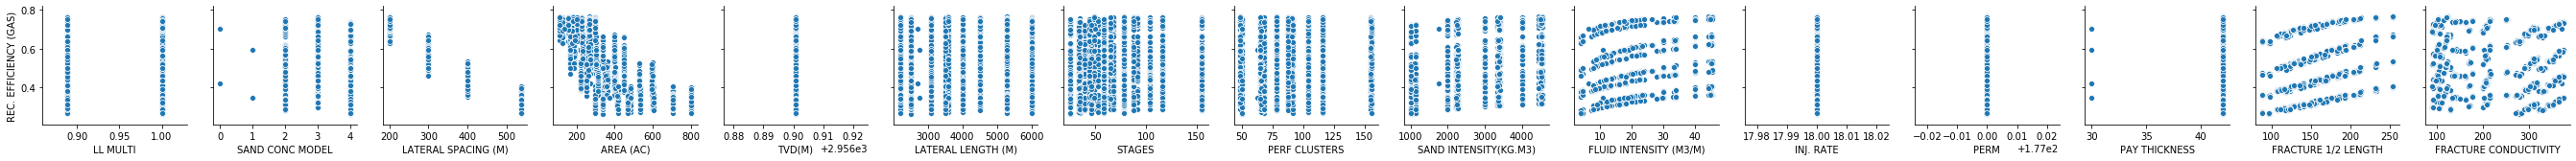

In [34]:
#REC. EFFICIENCY (GAS)
sns.pairplot(feat_target, y_vars="REC. EFFICIENCY (GAS)", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Possible correlation with Area (neg)

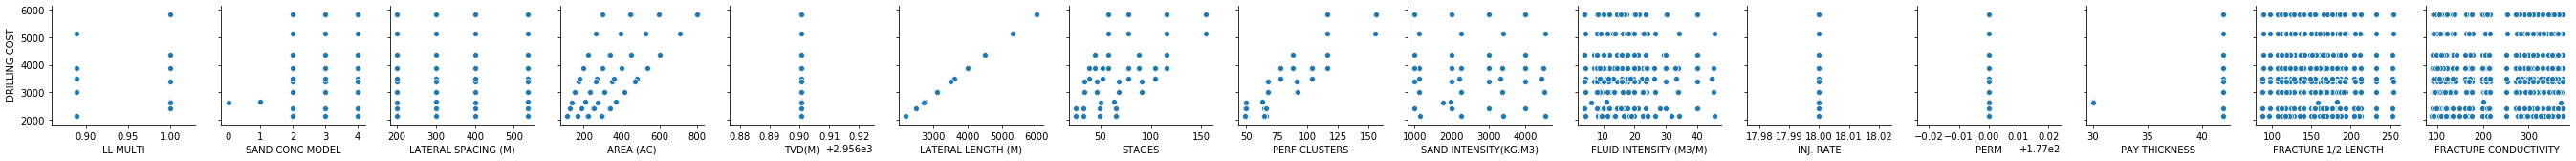

In [35]:
#DRILLING COST
sns.pairplot(feat_target, y_vars=" DRILLING COST", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Correlation with: Lateral Length, Perf Clusters, ~ Stages
- It seems that there are not enough samples

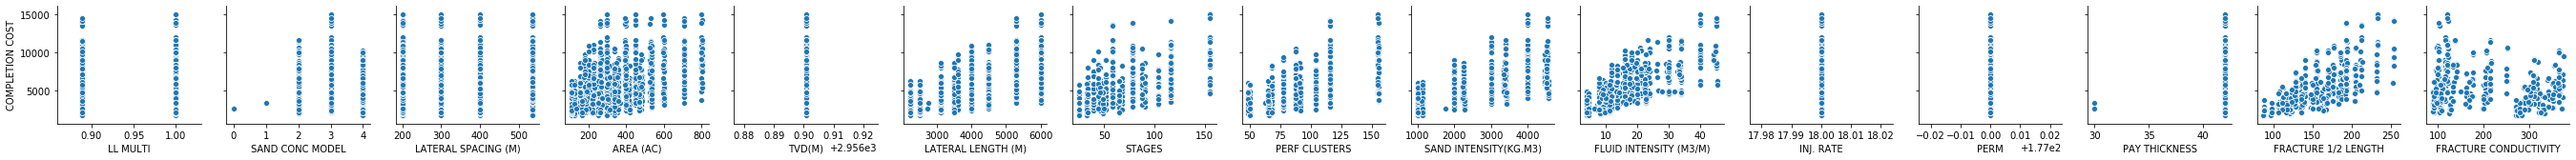

In [36]:
#COMPLETION COST
sns.pairplot(feat_target, y_vars="COMPLETION COST", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Possible correlations: Area, Lateral length, Stages, Perf clusters, sand intensity
- Correlation with fluid intensity and fracture 1/2 length

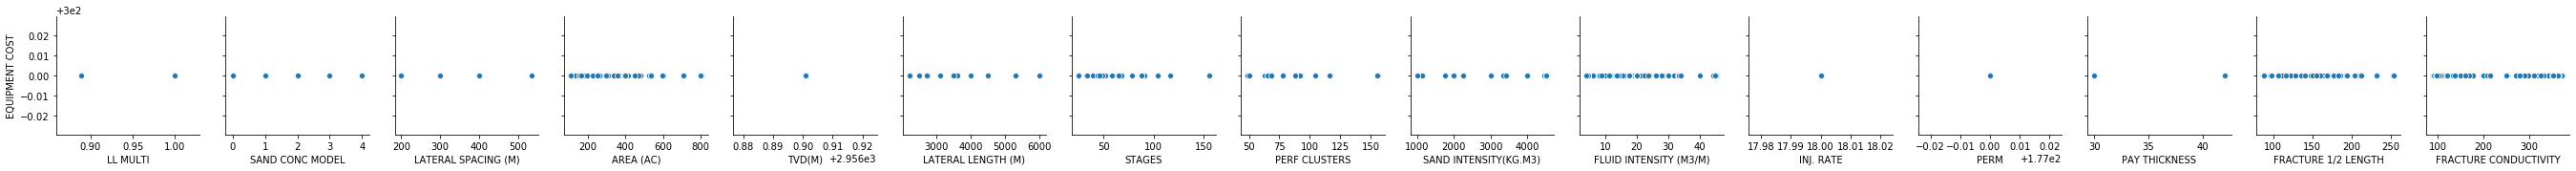

In [37]:
#EQUIPMENT COST
sns.pairplot(feat_target, y_vars="EQUIPMENT COST", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- No correlation

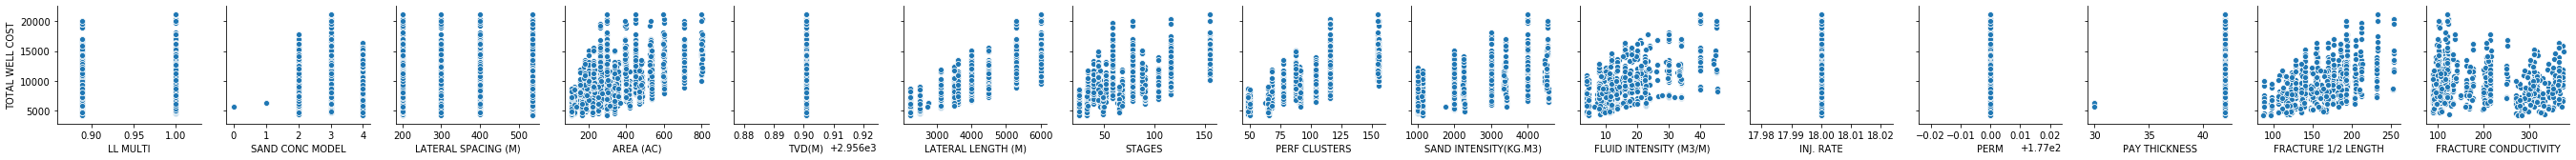

In [38]:
#TOTAL WELL COST
sns.pairplot(feat_target, y_vars="TOTAL WELL COST", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Possible correlations: Area, Lateral length, Stages, Perf clusters, sand intensity
- Correlation with fluid intensity and fracture 1/2 length

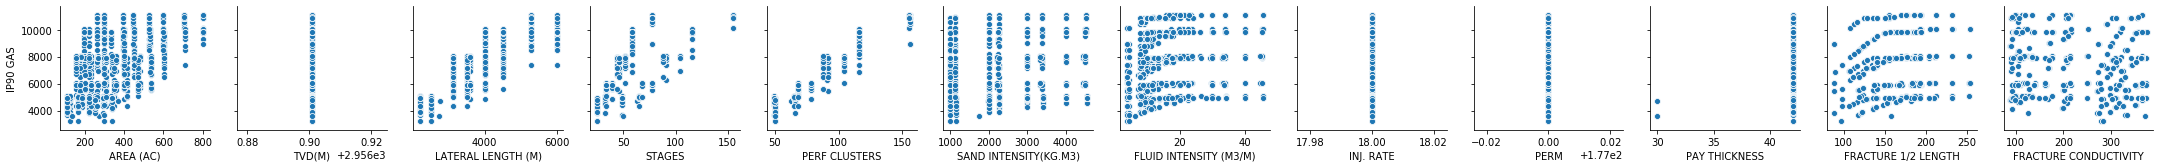

In [39]:
#IP90 GAS
sns.pairplot(feat_target, y_vars="IP90 GAS", x_vars=feat_target.iloc[:,3:15].columns.values)
plt.show()

- Correlations with ~Area, lateral length, Stages, Perf clusters

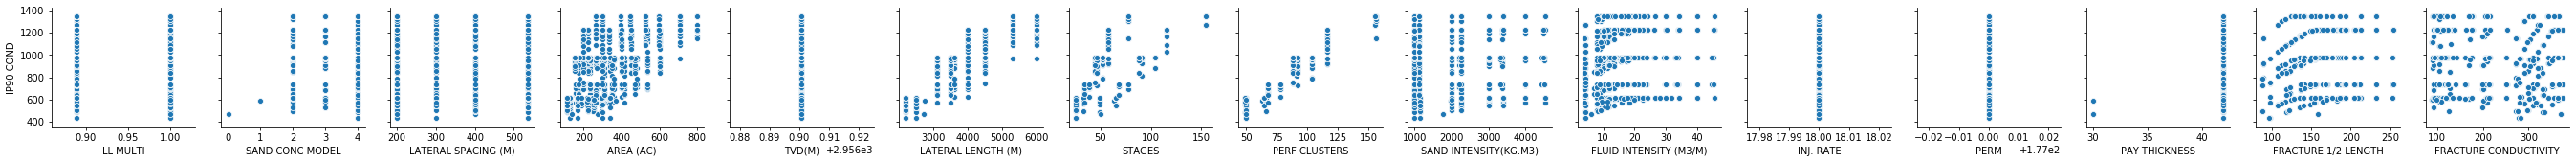

In [40]:
#IP90 COND
sns.pairplot(feat_target, y_vars="IP90 COND", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Correlations with ~Area, lateral length, Stages, Perf clusters

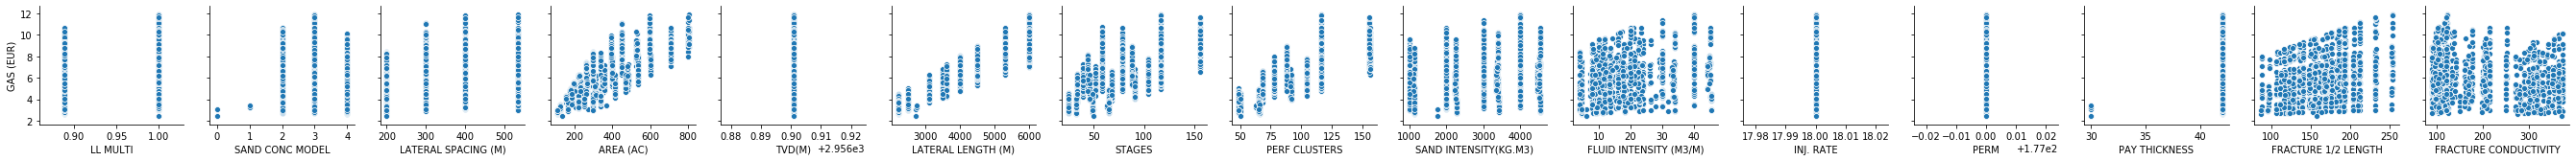

In [41]:
#GAS (EUR)
sns.pairplot(feat_target, y_vars="GAS (EUR)", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Correlations with Area, Lateral length, Stages, Perf clusters

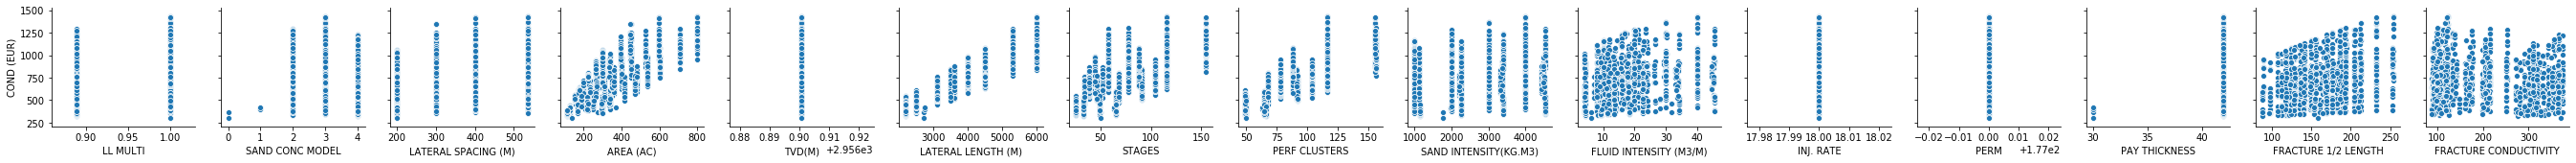

In [42]:
#COND (EUR)
sns.pairplot(feat_target, y_vars="COND (EUR)", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Correlations with Area, Lateral length, Stages, Perf clusters

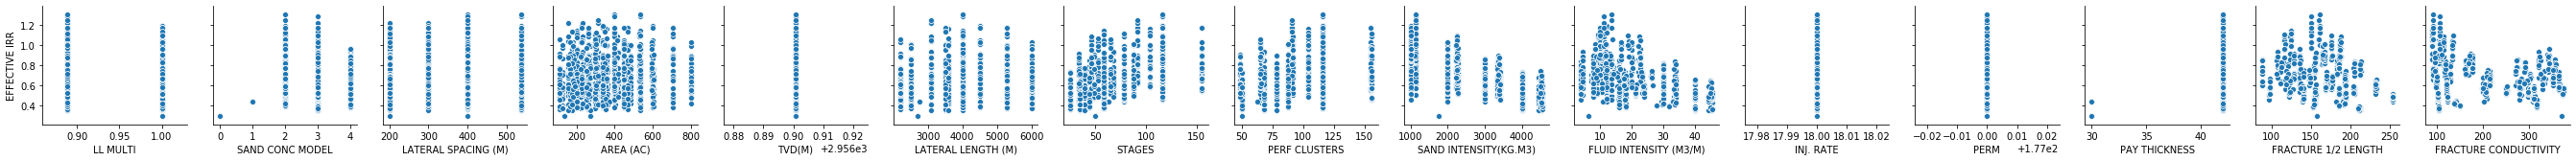

In [43]:
#EFFECTIVE IRR
sns.pairplot(feat_target, y_vars="EFFECTIVE IRR", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Possible correlations: Stages, fluid intensity (Not sure)

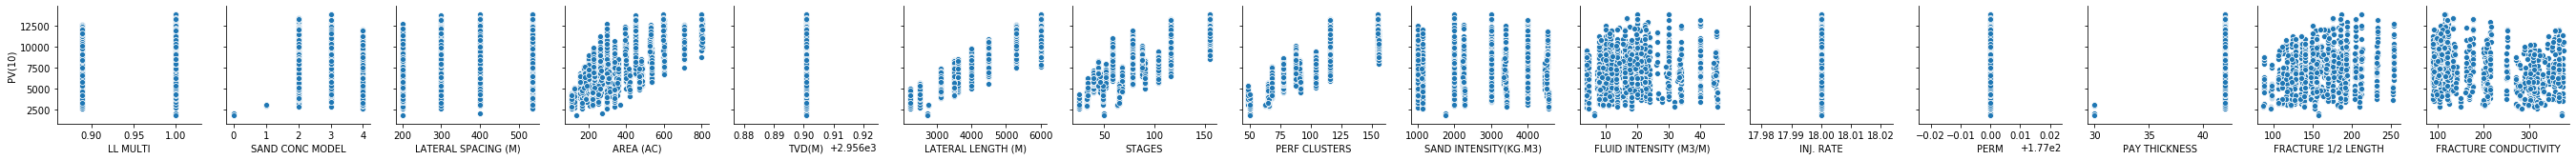

In [44]:
#PV(10)
sns.pairplot(feat_target, y_vars="PV(10)", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Correlations with Area, Lateral length, Stages, Perf clusters

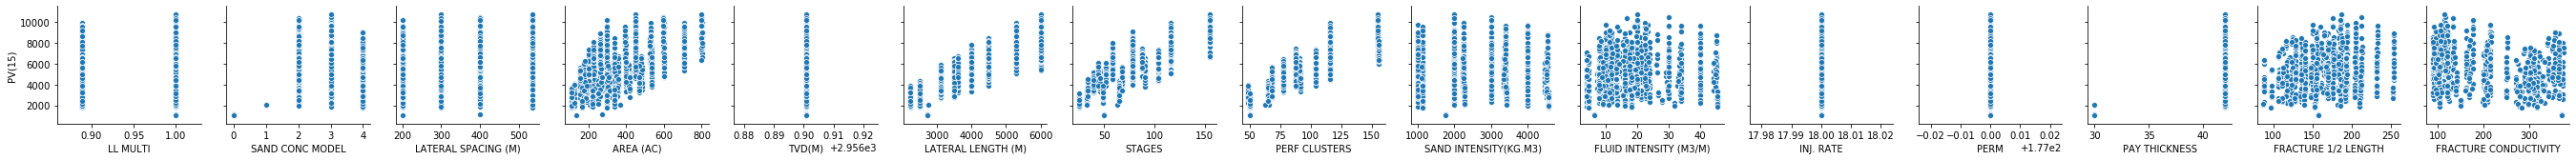

In [45]:
#PV(15)
sns.pairplot(feat_target, y_vars="PV(15)", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Correlations with Area, Lateral length, Stages, Perf clusters

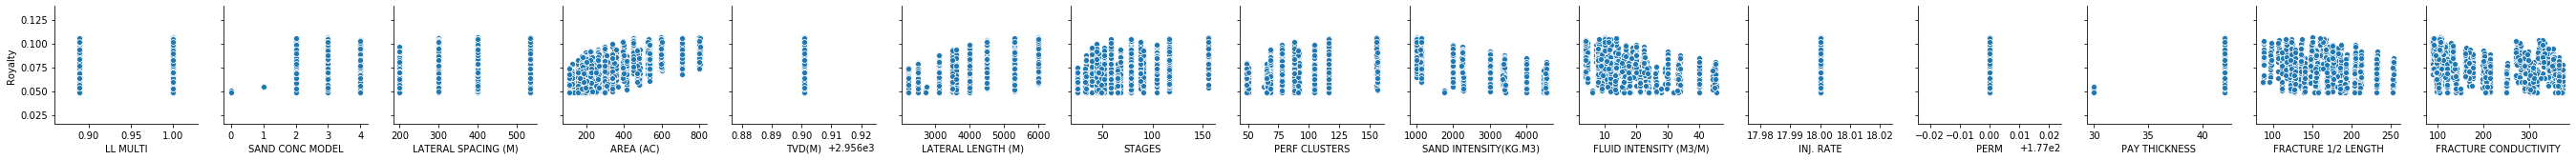

In [46]:
#Royalty
sns.pairplot(feat_target, y_vars="Royalty", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Possible correlations with Area, Lateral length, Sand intensity

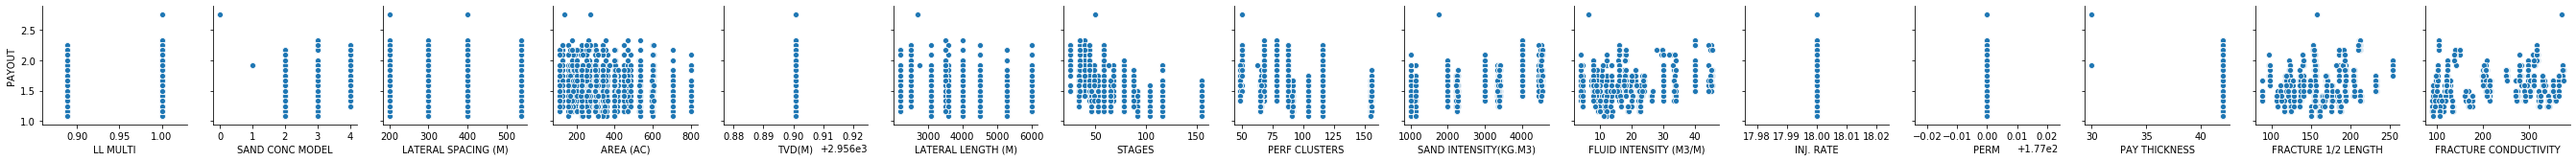

In [47]:
#PAYOUT
sns.pairplot(feat_target, y_vars="PAYOUT", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- No correlation 

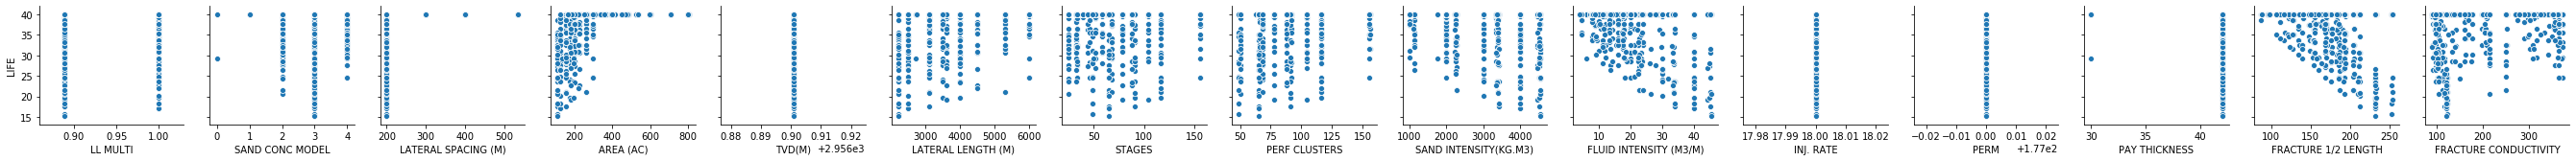

In [48]:
#LIFE
sns.pairplot(feat_target, y_vars="LIFE", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Possible correlation: fracture 1/2 length

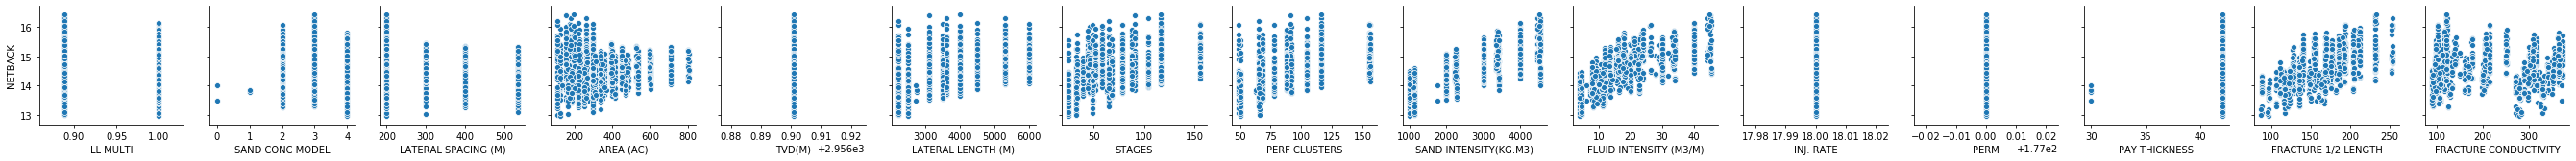

In [49]:
#NETBACK
sns.pairplot(feat_target, y_vars="NETBACK", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Correlation with ~sand intensity, fluid intensity, fracture 1/2 length

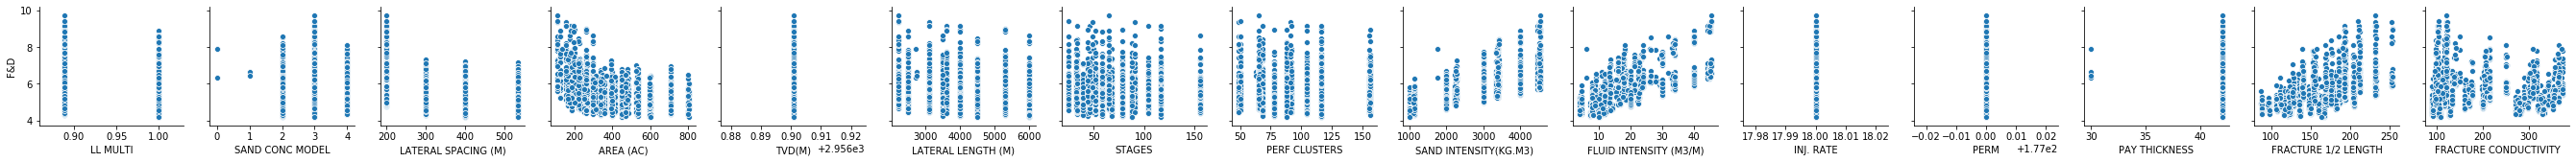

In [50]:
#F&D
sns.pairplot(feat_target, y_vars="F&D", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Correlations with Sand intensity, fluid intensity, fracture 1/2 length

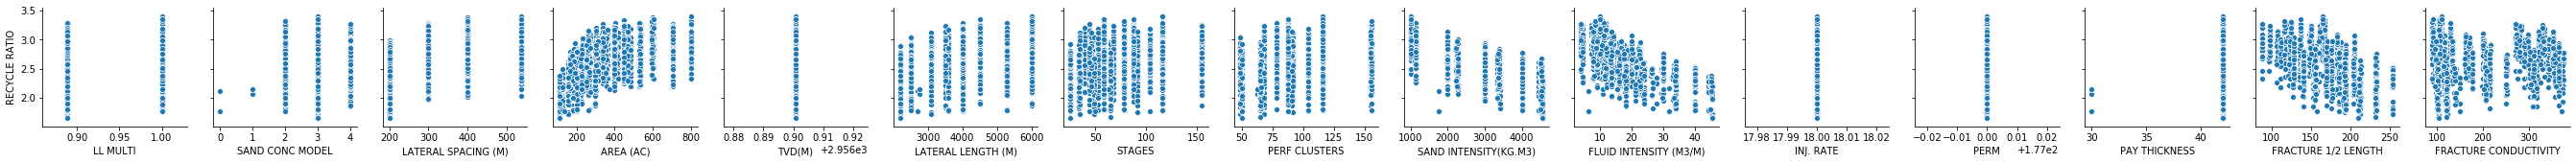

In [51]:
#RECYCLE RATIO
sns.pairplot(feat_target, y_vars="RECYCLE RATIO", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Correlations with Area, sand intensity, fluid intensity, fracture 1/2 length

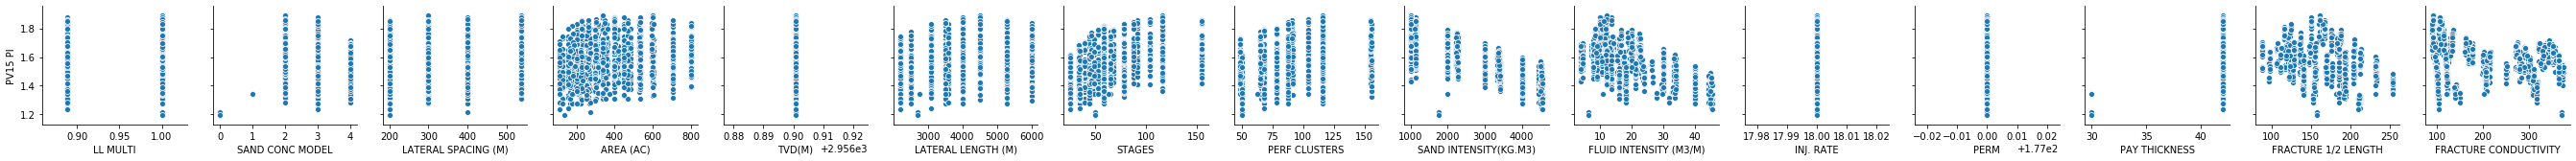

In [52]:
#PV15 PI
sns.pairplot(feat_target, y_vars="PV15 PI", x_vars=feat_target.iloc[:,:15].columns.values)
plt.show()

- Correlations with sand intensity, fluid intensity